In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv')
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [4]:
df.shape

(19104, 14)

In [5]:
df['Total Business Value'].describe()

count    1.910400e+04
mean     5.716621e+05
std      1.128312e+06
min     -6.000000e+06
25%      0.000000e+00
50%      2.500000e+05
75%      6.997000e+05
max      3.374772e+07
Name: Total Business Value, dtype: float64

In [6]:
import seaborn as sns

In [7]:
df.isnull().sum()

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [8]:
print(f'The number of rows in dataframe: {df.shape[0]}')
print(f"Unique number of Driver ID: {df['Driver_ID'].nunique()}")

The number of rows in dataframe: 19104
Unique number of Driver ID: 2381


### Analysing the meaning of presence of multiple Driver IDs for single ID 

In [9]:
df_driver_summary = df.groupby(by=['Driver_ID']).size().reset_index(name='Count')
# .size() == count(*)
df_driver_summary[df_driver_summary['Count'] > 1].sort_values(by=['Count'], ascending=False)


,Driver_ID,Count
489,569,24
230,275,24
887,1043,24
2289,2684,24
788,926,24
...,...,...
1381,1624,2
1382,1625,2
1383,1626,2
354,419,2


### Looking in depth for Driver_ID 569 to uncover the meaning of multiple count

In [10]:
df[df['Driver_ID'] == 569]

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
3873,3873,01/01/19,569,38.0,1.0,C26,0,111743,31/12/15,NaN,2,3,200000,3
3874,3874,02/01/19,569,38.0,1.0,C26,0,111743,31/12/15,NaN,2,3,1617630,3
3875,3875,03/01/19,569,38.0,1.0,C26,0,111743,31/12/15,NaN,2,3,2885720,3
3876,3876,04/01/19,569,38.0,1.0,C26,0,111743,31/12/15,NaN,2,3,155320,2
3877,3877,05/01/19,569,38.0,1.0,C26,0,111743,31/12/15,NaN,2,3,291010,2
3878,3878,06/01/19,569,38.0,1.0,C26,0,111743,31/12/15,NaN,2,3,147900,2
3879,3879,07/01/19,569,38.0,1.0,C26,0,111743,31/12/15,NaN,2,3,850000,4
3880,3880,08/01/19,569,39.0,1.0,C26,0,111743,31/12/15,NaN,2,3,912000,4
3881,3881,09/01/19,569,39.0,1.0,C26,0,111743,31/12/15,NaN,2,3,1765000,4
3882,3882,10/01/19,569,39.0,1.0,C26,0,111743,31/12/15,NaN,2,3,172000,3


### Unnamed: 0 is basically index, so dropping it

In [11]:
#df.drop(['Unnamed: 0'], inplace = True, axis =1)
df[df['Driver_ID'] == 569]

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
3873,3873,01/01/19,569,38.0,1.0,C26,0,111743,31/12/15,NaN,2,3,200000,3
3874,3874,02/01/19,569,38.0,1.0,C26,0,111743,31/12/15,NaN,2,3,1617630,3
3875,3875,03/01/19,569,38.0,1.0,C26,0,111743,31/12/15,NaN,2,3,2885720,3
3876,3876,04/01/19,569,38.0,1.0,C26,0,111743,31/12/15,NaN,2,3,155320,2
3877,3877,05/01/19,569,38.0,1.0,C26,0,111743,31/12/15,NaN,2,3,291010,2
3878,3878,06/01/19,569,38.0,1.0,C26,0,111743,31/12/15,NaN,2,3,147900,2
3879,3879,07/01/19,569,38.0,1.0,C26,0,111743,31/12/15,NaN,2,3,850000,4
3880,3880,08/01/19,569,39.0,1.0,C26,0,111743,31/12/15,NaN,2,3,912000,4
3881,3881,09/01/19,569,39.0,1.0,C26,0,111743,31/12/15,NaN,2,3,1765000,4
3882,3882,10/01/19,569,39.0,1.0,C26,0,111743,31/12/15,NaN,2,3,172000,3


#### The data is basically for each month, so we need to aggregate it for each driver_ID

#### Another important observation made is that LastWorkingDate == NaN indicates that driver hasn't left.
#### We can use this to create target col for 'has the driver left: 0 or 1'

# Grouping By driver_ID to create dataset with unique driver_IDs

In [12]:
# Define a function to return unique values as a list if there are multiple unique_values 
# Used for string/ DateTime columns on which aggregate fns can't be applied
def unique_values(series):
    ans = list(np.unique(series))
    return (ans[0] if len(ans)>0 else ans)

In [13]:
# Group the DataFrame by 'Driver_ID' and aggregate various columns
df_mod = df.groupby("Driver_ID").agg({
    'MMM-YY': 'size',                    # Count the number of entries for each 'Driver_ID'
    'Age': 'max',                        # Get the maximum age for each 'Driver_ID'
    'City': unique_values,               # Get the unique cities for each 'Driver_ID'
    'Education_Level': 'max',            # Get the highest education level for each 'Driver_ID'
    'Income': 'mean',                    # Calculate the mean income for each 'Driver_ID'
    'Gender' : unique_values,
    'Dateofjoining': unique_values,      # Get the unique joining dates for each 'Driver_ID'
    'Joining Designation': unique_values, # Get the unique joining designations for each 'Driver_ID'
    'Grade': 'mean',                     # Calculate the mean grade for each 'Driver_ID'
    'Total Business Value': 'sum',       # Sum the total business value for each 'Driver_ID'
    'Quarterly Rating': 'mean'           # Calculate the mean quarterly rating for each 'Driver_ID'
}).reset_index()
# When using in-built aggregation functions in pandas, you typically specify them as strings. These strings correspond to specific operations that pandas knows how to perform. For example:
# 'size' for counting the number of entries
# 'max' for finding the maximum value
# 'mean' for calculating the mean
# 'sum' for summing up values
# For operations that aren't directly supported by in-built functions (like getting unique values), you need to define a custom function.

In [14]:
## Checking if any list is present, ie cols with multiple city values, or multiple joining/resignming dates 
print(df_mod[df_mod['City'].apply(lambda x: isinstance(x, list))].shape[0],
df_mod[df_mod['Dateofjoining'].apply(lambda x: isinstance(x, list))].shape[0],
df_mod[df_mod['Gender'].apply(lambda x: isinstance(x, list))].shape[0],
df_mod[df_mod['Joining Designation'].apply(lambda x: isinstance(x, list))].shape[0])



0 0 0 0


In [15]:
df_mod.head()

,Driver_ID,MMM-YY,Age,City,Education_Level,Income,Gender,Dateofjoining,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,3,28.0,C23,2,57387.0,0.0,24/12/18,1,1.0,1715580,2.0
1,2,2,31.0,C7,2,67016.0,0.0,11/06/20,2,2.0,0,1.0
2,4,5,43.0,C13,2,65603.0,0.0,12/07/19,2,2.0,350000,1.0
3,5,3,29.0,C9,0,46368.0,0.0,01/09/19,1,1.0,120360,1.0
4,6,5,31.0,C11,1,78728.0,1.0,31/07/20,3,3.0,1265000,1.6


In [16]:
print(f'The number of rows in dataframe: {df_mod.shape[0]}')
print(f"Unique number of Driver ID: {df_mod['Driver_ID'].nunique()}")

The number of rows in dataframe: 2381
Unique number of Driver ID: 2381


## Create target column for customer churn prediction

In [96]:
# 1. Extract the last working date for each Driver_ID
last_working_date = df.groupby('Driver_ID')['LastWorkingDate'].unique().apply(lambda x: x[-1])

# 2. Merge this information with df_mod
final_df = pd.merge(left=last_working_date.reset_index(), right=df_mod, on='Driver_ID', how='outer')


In [97]:
final_df.head()

,Driver_ID,LastWorkingDate,MMM-YY,Age,City,Education_Level,Income,Gender,Dateofjoining,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,03/11/19,3,28.0,C23,2,57387.0,0.0,24/12/18,1,1.0,1715580,2.0
1,2,NaN,2,31.0,C7,2,67016.0,0.0,11/06/20,2,2.0,0,1.0
2,4,27/04/20,5,43.0,C13,2,65603.0,0.0,12/07/19,2,2.0,350000,1.0
3,5,03/07/19,3,29.0,C9,0,46368.0,0.0,01/09/19,1,1.0,120360,1.0
4,6,NaN,5,31.0,C11,1,78728.0,1.0,31/07/20,3,3.0,1265000,1.6


In [98]:
final_df['Gender'].value_counts()

Gender
0.0    1404
1.0     977
Name: count, dtype: int64

In [99]:
final_df['Churn'] = final_df['LastWorkingDate'].fillna(-1) # Indicating the driver hasn't left

In [100]:
# Creating the target column
def churn_label(x):
    if x == -1:
        return 0
    else: 
        return 1
final_df['Churn'] = final_df['Churn'].apply(churn_label)


In [101]:
final_df.head()

,Driver_ID,LastWorkingDate,MMM-YY,Age,City,Education_Level,Income,Gender,Dateofjoining,Joining Designation,Grade,Total Business Value,Quarterly Rating,Churn
0,1,03/11/19,3,28.0,C23,2,57387.0,0.0,24/12/18,1,1.0,1715580,2.0,1
1,2,NaN,2,31.0,C7,2,67016.0,0.0,11/06/20,2,2.0,0,1.0,0
2,4,27/04/20,5,43.0,C13,2,65603.0,0.0,12/07/19,2,2.0,350000,1.0,1
3,5,03/07/19,3,29.0,C9,0,46368.0,0.0,01/09/19,1,1.0,120360,1.0,1
4,6,NaN,5,31.0,C11,1,78728.0,1.0,31/07/20,3,3.0,1265000,1.6,0


In [102]:
# Checking Skewness of data
final_df['Churn'].value_counts(normalize=True)* 100


Churn
1    67.870643
0    32.129357
Name: proportion, dtype: float64

### Churn Data
##### Roughly **68%** of Drivers Churn
##### **32%** of Drivers are not Churn 
##### Data is imbalanced

In [103]:
final_df.isnull().sum()

Driver_ID                 0
LastWorkingDate         765
MMM-YY                    0
Age                       0
City                      0
Education_Level           0
Income                    0
Gender                    0
Dateofjoining             0
Joining Designation       0
Grade                     0
Total Business Value      0
Quarterly Rating          0
Churn                     0
dtype: int64

## Feature Engineering


Let us check those drivers who has a increase in Quaterly rating

In [104]:
def rating_increase(df):
    # Check if the dataframe has 2 or more records
    if len(df) >= 2:
        # Iterate through the dataframe (assuming it's sorted by date or time)
        for i in range(len(df)):
            # Compare the last record with the second to last record
            # If the last record's value is greater than the second to last, return 1
            if df[-1] > df[-2]:
                return 1
            # If the last record's value is not greater, return 0
            else:
                return 0
    # If there are fewer than 2 records, return 0 (not enough data to determine increase)
    else:
        return 0

# This is quaterly rating change wrt the quarter in which driver left 

In [105]:
# Apply the rating_increase function to the grouped data
Quarterly_Rating_increased = df.groupby("Driver_ID")["Quarterly Rating"].unique().apply(rating_increase)
Quarterly_Rating_increased.value_counts()

Quarterly Rating
0    1836
1     545
Name: count, dtype: int64

In [106]:
final_df = pd.merge(left = Quarterly_Rating_increased,right = final_df,on = "Driver_ID",how="outer")
final_df.rename(columns = {'Quarterly Rating':'Quarterly_Rating_increased'}, inplace=True)

Let us check those drivers who has a increase in monthly income

In [107]:
def income_increase(df):
    # Check if the dataframe has 2 or more records
    if len(df) >= 2:
        # Compare the last record with the second to last record
        # If the last record's value is greater than the second to last, return 1
        if df[-1] > df[-2]:
            return 1
        # If the last record's value is not greater, return 0
        else:
            return 0
    # If there are fewer than 2 records, return 0 (not enough data to determine increase)
    else:
        return 0

In [108]:
income_increased = df.groupby("Driver_ID")["Income"].unique().apply(income_increase)
final_df = pd.merge(left=income_increased, right=final_df, on="Driver_ID", how="outer")

final_df.rename(columns={'Income_x': 'Income_increased'}, inplace=True)


In [109]:
final_df['Income_increased'].value_counts()

Income_increased
0    2337
1      44
Name: count, dtype: int64

### Creating a col of total working tenure of drivers

In [110]:
final_df['Dateofjoining'].dtype

dtype('O')

In [111]:
final_df['Dateofjoining'] = pd.to_datetime(final_df['Dateofjoining'])
final_df['LastWorkingDate'] = pd.to_datetime(final_df['LastWorkingDate'])

/tmp/ipykernel_36/2899809078.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final_df['Dateofjoining'] = pd.to_datetime(final_df['Dateofjoining'])
/tmp/ipykernel_36/2899809078.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final_df['LastWorkingDate'] = pd.to_datetime(final_df['LastWorkingDate'])


In [155]:
final_df.rename(columns = {'MMM-YY':'Length_of_Service'})

,Income_increased,Quarterly Rating_x,Length_of_Service,Age,City,Education_Level,Income,Gender,Joining Designation,Grade,Total Business Value,Quarterly Rating_y,Churn,Driver_tenure_days,Quarterly_Rating
0,0,0,3,28.0,0.769859,2,57387.0,0.0,1,1.0,1715580,2.000000,1,77,2.0
1,0,0,2,31.0,0.684190,2,67016.0,0.0,2,2.0,0,1.000000,0,52,1.0
2,0,0,5,43.0,0.816064,2,65603.0,0.0,2,2.0,350000,1.000000,1,142,1.0
3,0,0,3,29.0,0.706553,0,46368.0,0.0,1,1.0,120360,1.000000,1,57,1.0
4,0,1,5,31.0,0.702829,1,78728.0,1.0,3,3.0,1265000,1.600000,0,150,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0,1,24,34.0,0.698531,0,82815.0,0.0,2,3.0,21748820,2.625000,0,1901,3.0
2377,0,0,3,34.0,0.706553,0,12105.0,1.0,1,1.0,0,1.000000,1,61,1.0
2378,0,0,9,45.0,0.570044,0,35370.0,0.0,2,2.0,2815090,1.666667,1,418,2.0
2379,0,0,6,28.0,0.730263,2,69498.0,1.0,1,1.0,977830,1.500000,1,334,2.0


In [112]:
final_df[['LastWorkingDate','Dateofjoining']]

,LastWorkingDate,Dateofjoining
0,2019-03-11,2018-12-24
1,NaT,2020-11-06
2,2020-04-27,2019-12-07
3,2019-03-07,2019-01-09
4,NaT,2020-07-31
...,...,...
2376,NaT,2015-10-15
2377,2020-10-28,2020-08-28
2378,2019-09-22,2018-07-31
2379,2019-06-20,2018-07-21


In [113]:
final_df['LastWorkingDate'] = final_df['LastWorkingDate'].fillna(final_df['LastWorkingDate'].max())

In [114]:
final_df['Driver_tenure_days'] = (final_df['LastWorkingDate'] - final_df['Dateofjoining'])
final_df['Driver_tenure_days']

0        77 days
1        52 days
2       142 days
3        57 days
4       150 days
          ...   
2376   1901 days
2377     61 days
2378    418 days
2379    334 days
2380    203 days
Name: Driver_tenure_days, Length: 2381, dtype: timedelta64[ns]

In [115]:
# Convert datetime to int
final_df['Driver_tenure_days'] = final_df['Driver_tenure_days'].dt.days
final_df['Driver_tenure_days']

0         77
1         52
2        142
3         57
4        150
        ... 
2376    1901
2377      61
2378     418
2379     334
2380     203
Name: Driver_tenure_days, Length: 2381, dtype: int64

In [116]:
final_df.isnull().sum()

Driver_ID               0
Income_increased        0
Quarterly Rating_x      0
LastWorkingDate         0
MMM-YY                  0
Age                     0
City                    0
Education_Level         0
Income_y                0
Gender                  0
Dateofjoining           0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating_y      0
Churn                   0
Driver_tenure_days      0
dtype: int64

In [117]:
final_df.drop(["LastWorkingDate","Dateofjoining"],inplace=True,axis = 1)

In [118]:
final_df.Grade.unique()

array([1.        , 2.        , 3.        , 4.        , 3.41666667,
       4.38888889, 3.25      , 2.17647059, 5.        , 3.04545455,
       1.25      , 1.125     , 2.25      , 2.23076923, 3.16666667,
       1.04166667, 2.14285714, 4.125     , 2.125     , 2.33333333,
       2.16666667, 2.05555556, 1.08333333, 1.15789474, 3.04166667,
       2.04166667, 4.05555556, 2.34782609])

In [119]:
final_df.Grade.round().unique()

array([1., 2., 3., 4., 5.])

In [120]:
final_df.columns

Index(['Driver_ID', 'Income_increased', 'Quarterly Rating_x', 'MMM-YY', 'Age',
       'City', 'Education_Level', 'Income_y', 'Gender', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating_y', 'Churn',
       'Driver_tenure_days'],
      dtype='object')

In [121]:
final_df["Grade"] = np.round(final_df["Grade"])
final_df["Quarterly_Rating"]= final_df["Quarterly Rating_y"].round()
final_df.rename(columns = {'Income_y': 'Income'}, inplace =True)


# EDA on Final Data

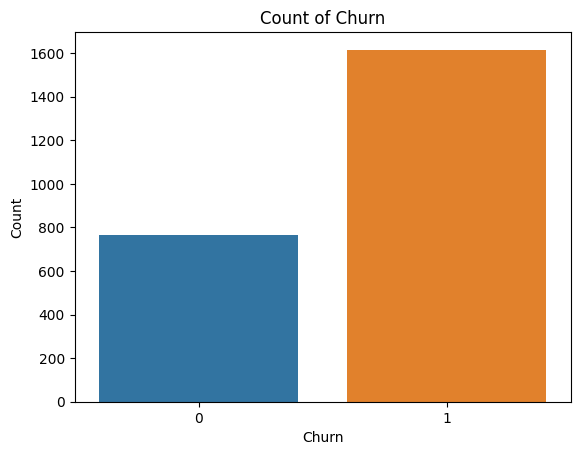

In [122]:
import matplotlib.pyplot as plt
# Create a count plot
sns.countplot(x='Churn', data=final_df)

# Display the plot
plt.title('Count of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


         Driver_ID  Income_increased  Quarterly Rating_x      MMM-YY  \
count  2381.000000       2381.000000         2381.000000  2381.00000   
mean   1397.559009          0.018480            0.228895     8.02352   
std     806.161628          0.134706            0.420210     6.78359   
min       1.000000          0.000000            0.000000     1.00000   
25%     695.000000          0.000000            0.000000     3.00000   
50%    1400.000000          0.000000            0.000000     5.00000   
75%    2100.000000          0.000000            0.000000    10.00000   
max    2788.000000          1.000000            1.000000    24.00000   

               Age  Education_Level         Income       Gender  \
count  2381.000000       2381.00000    2381.000000  2381.000000   
mean     33.663167          1.00756   59232.460484     0.410332   
std       5.983375          0.81629   28298.214012     0.491997   
min      21.000000          0.00000   10747.000000     0.000000   
25%      29.0000

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Figure size 1000x600 with 0 Axes>

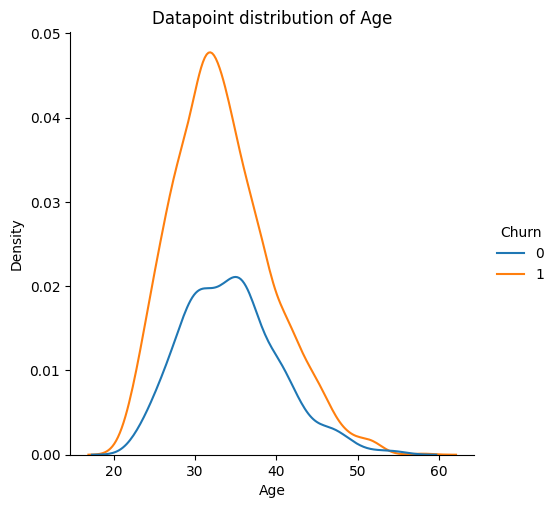

In [123]:
def plot_histogram(df, x, hue=None):
    """
    Plot the histogram (kernel density estimate) of a continuous feature.

    Parameters:
    - df: DataFrame containing the feature to plot.
    - x: Column name or Series to plot.
    - hue: Optional; column name to map plot aspects to different colors.
    """
    # Print summary statistics for the DataFrame or Series
    print(df.describe())
    
    # Set up the figure size
    plt.figure(figsize=(10, 6))
    
    # Plot a kernel density estimate (KDE) plot to show the distribution
    sns.displot(data=df, x=x, hue=hue, kind='kde', color='red')
    
    # Add a title to the plot
    plt.title(f'Datapoint distribution of {x}')
    plt.show()
plot_histogram(final_df, x='Age', hue='Churn')

count      2381.000000
mean      59232.460484
std       28298.214012
min       10747.000000
25%       39104.000000
50%       55285.000000
75%       75835.000000
max      188418.000000
Name: Income, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


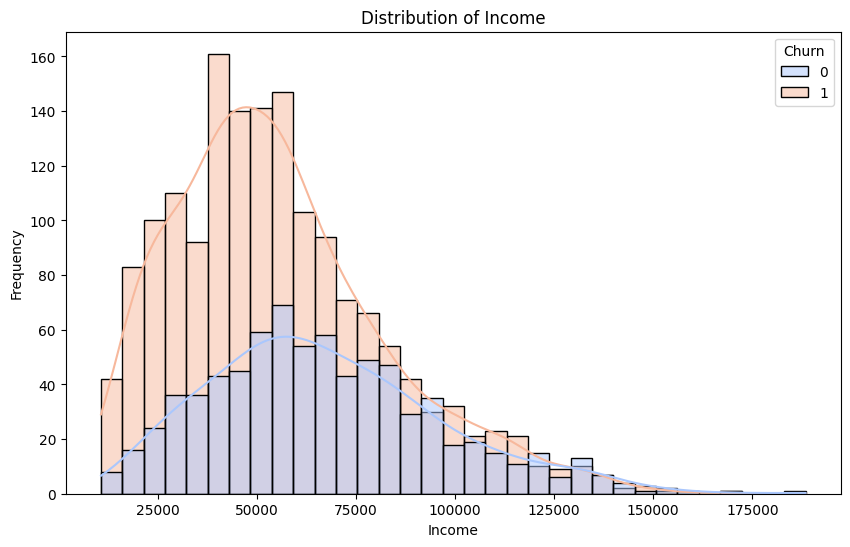

In [124]:
def plot_histogram(df, column_name, hue=None):
    """
    Plot a histogram or KDE plot of a continuous feature.

    Parameters:
    - df: DataFrame containing the data.
    - column_name: Name of the column to plot.
    - hue: Optional; name of the column to use for color coding.
    """
    # Print summary statistics for the column
    print(df[column_name].describe())
    
    # Set up the figure size
    plt.figure(figsize=(10, 6))
    
    # Plot a histogram or KDE plot of the column
    sns.histplot(data=df, x=column_name, hue=hue, kde=True, palette='coolwarm')
    
    # Add a title to the plot
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

# Call the function to plot the histogram for the 'Income' column with 'Churn' as hue
plot_histogram(final_df, 'Income', hue='Churn')

Gender
0.0    1404
1.0     977
Name: count, dtype: int64


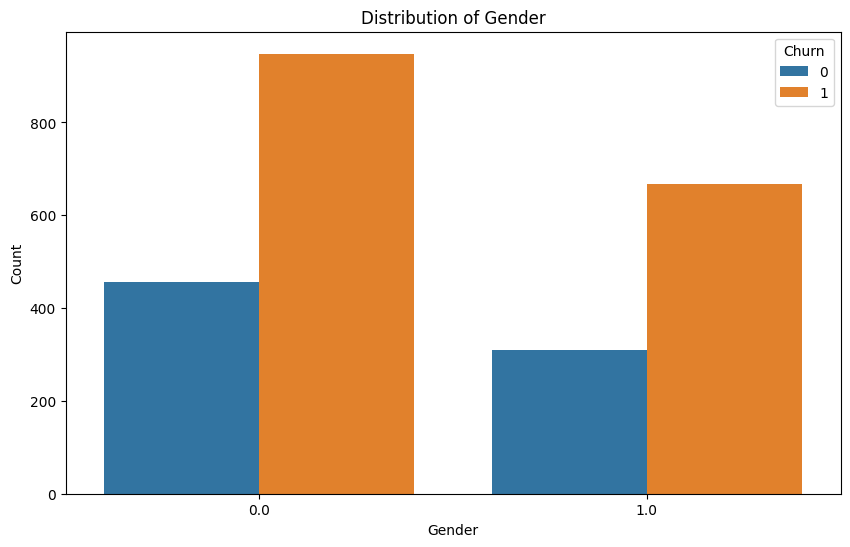

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_countplot(df, column_name, hue=None, top_n=100):
    """
    Plot a countplot to visualize the distribution of a categorical feature.
    
    Parameters:
    - df: DataFrame containing the data.
    - column_name: Name of the column to plot.
    - hue: Optional; name of the column to use for color coding.
    - top_n: Optional; number of top categories to display.
    """
    # Print summary statistics for the column
    print(df[column_name].value_counts())
    
    # Set up the figure size
    plt.figure(figsize=(10, 6))
    
    # Plot the countplot with optional hue
    sns.countplot(data=df, x=column_name, hue=hue, order=df[column_name].value_counts().index[:top_n])
    
    # Add a title and labels
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.show()

# Call the function to plot the countplot for the 'Gender' column with 'Churn' as hue
plot_countplot(final_df, 'Gender', hue='Churn')


In [126]:
final_df.isnull().sum()

Driver_ID               0
Income_increased        0
Quarterly Rating_x      0
MMM-YY                  0
Age                     0
City                    0
Education_Level         0
Income                  0
Gender                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating_y      0
Churn                   0
Driver_tenure_days      0
Quarterly_Rating        0
dtype: int64

### Target Encoding City Names

In [156]:
from category_encoders import TargetEncoder
te  = TargetEncoder()
final_df["City"] = te.fit_transform(X = final_df["City"],y = final_df["Churn"])
final_df.head()

,Income_increased,Quarterly Rating_x,MMM-YY,Age,City,Education_Level,Income,Gender,Joining Designation,Grade,Total Business Value,Quarterly Rating_y,Churn,Driver_tenure_days,Quarterly_Rating
0,0,0,3,28.0,0.769859,2,57387.0,0.0,1,1.0,1715580,2.0,1,77,2.0
1,0,0,2,31.0,0.684190,2,67016.0,0.0,2,2.0,0,1.0,0,52,1.0
2,0,0,5,43.0,0.816064,2,65603.0,0.0,2,2.0,350000,1.0,1,142,1.0
3,0,0,3,29.0,0.706553,0,46368.0,0.0,1,1.0,120360,1.0,1,57,1.0
4,0,1,5,31.0,0.702829,1,78728.0,1.0,3,3.0,1265000,1.6,0,150,2.0


In [157]:
final_df.drop(columns=['Driver_ID'], axis = 1, inplace =True)

KeyError: "['Driver_ID'] not found in axis"

In [132]:
plt.plot_heatmap(final_df, x = 15, y = 10)


AttributeError: module 'matplotlib.pyplot' has no attribute 'plot_heatmap'

### Model Building

In [158]:
X = final_df.drop(["Churn"],axis = 1)
y = final_df["Churn"]

### KNN

In [159]:
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

In [160]:
X = pd.DataFrame(imputer.fit_transform(X),columns=X.columns)
X

,Income_increased,Quarterly Rating_x,MMM-YY,Age,City,Education_Level,Income,Gender,Joining Designation,Grade,Total Business Value,Quarterly Rating_y,Driver_tenure_days,Quarterly_Rating
0,0.0,0.0,3.0,28.0,0.769859,2.0,57387.0,0.0,1.0,1.0,1715580.0,2.000000,77.0,2.0
1,0.0,0.0,2.0,31.0,0.684190,2.0,67016.0,0.0,2.0,2.0,0.0,1.000000,52.0,1.0
2,0.0,0.0,5.0,43.0,0.816064,2.0,65603.0,0.0,2.0,2.0,350000.0,1.000000,142.0,1.0
3,0.0,0.0,3.0,29.0,0.706553,0.0,46368.0,0.0,1.0,1.0,120360.0,1.000000,57.0,1.0
4,0.0,1.0,5.0,31.0,0.702829,1.0,78728.0,1.0,3.0,3.0,1265000.0,1.600000,150.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0.0,1.0,24.0,34.0,0.698531,0.0,82815.0,0.0,2.0,3.0,21748820.0,2.625000,1901.0,3.0
2377,0.0,0.0,3.0,34.0,0.706553,0.0,12105.0,1.0,1.0,1.0,0.0,1.000000,61.0,1.0
2378,0.0,0.0,9.0,45.0,0.570044,0.0,35370.0,0.0,2.0,2.0,2815090.0,1.666667,418.0,2.0
2379,0.0,0.0,6.0,28.0,0.730263,2.0,69498.0,1.0,1.0,1.0,977830.0,1.500000,334.0,2.0


In [161]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train ,y_test = train_test_split(X,y,random_state=5,test_size=0.2)

In [162]:
y_train.value_counts()

Churn
1    1301
0     603
Name: count, dtype: int64

In [163]:
y_test.value_counts()

Churn
1    315
0    162
Name: count, dtype: int64

## Scaling the data

In [164]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [165]:
X_train = scaler.transform(X_train) 
X_test =  scaler.transform(X_test)

## Random Forest

In [166]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100,
    criterion='entropy',
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight="balanced",
    ccp_alpha=0.0085,
    max_samples=None,)

In [167]:
RF.fit(X_train,y_train)

RandomForestClassifier(ccp_alpha=0.0085, class_weight='balanced',
                       criterion='entropy', max_depth=10)

In [172]:
RF.score(X_train,y_train),RF.score(X_test,y_test)

(0.842436974789916, 0.7987421383647799)

In [169]:
RF.feature_importances_

array([5.88411119e-03, 7.24944973e-02, 2.38312410e-01, 1.83790426e-02,
       1.68451926e-02, 1.11470281e-03, 2.53927321e-02, 1.67639468e-04,
       5.67065335e-02, 3.20307989e-02, 1.53589935e-01, 1.28108760e-01,
       1.67631673e-01, 8.33419714e-02])

<Axes: >

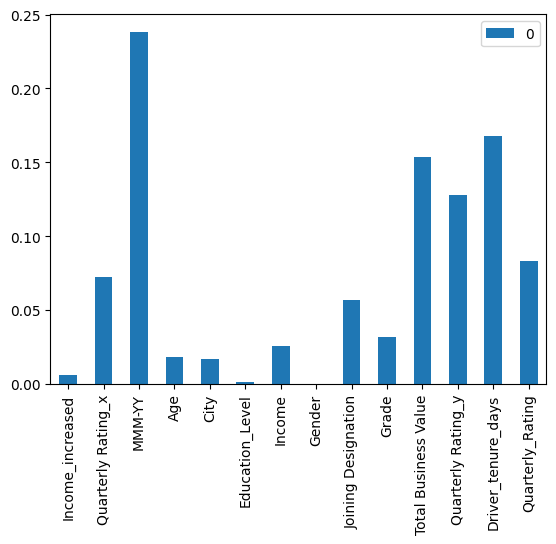

In [170]:
pd.DataFrame(data=RF.feature_importances_,index=X.columns).plot(kind="bar")

In [173]:
from sklearn.metrics import f1_score , precision_score, recall_score,confusion_matrix
confusion_matrix(y_test,RF.predict(X_test) )

array([[ 98,  64],
       [ 32, 283]])

In [174]:
confusion_matrix(y_train,RF.predict(X_train) )


array([[ 444,  159],
       [ 141, 1160]])

In [175]:
f1_score(y_test,RF.predict(X_test)),f1_score(y_train,RF.predict(X_train))


(0.8549848942598188, 0.8854961832061068)

In [176]:
precision_score(y_test,RF.predict(X_test)),precision_score(y_train,RF.predict(X_train))


(0.8155619596541787, 0.8794541319181198)

In [177]:
recall_score(y_test,RF.predict(X_test)),recall_score(y_train,RF.predict(X_train))


(0.8984126984126984, 0.8916218293620292)

## GridSearchCV on Random Forest Classifier


In [178]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {"max_depth":[7,10,15],
             "n_estimators":[100,200,300,400],
             "max_features":[4,7,10],
             "ccp_alpha":[0.0005,0.00075,0.001]}

RFC = RandomForestClassifier()
grid_search = GridSearchCV(
    estimator = RFC,
    param_grid = parameters,
    scoring = "accuracy",
    n_jobs = -1,
    refit=True,  # We don't need to train the model again as this parameter takes care of it.
    cv=3,
    pre_dispatch='2*n_jobs',
    return_train_score=False)


In [179]:
grid_search.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0005, 0.00075, 0.001],
                         'max_depth': [7, 10, 15], 'max_features': [4, 7, 10],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [180]:
grid_search.best_estimator_

RandomForestClassifier(ccp_alpha=0.00075, max_depth=10, max_features=7,
                       n_estimators=300)

In [181]:
grid_search.best_score_

0.8450723233728276

## Bagging Tree Classifier

In [182]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
bagging_classifier_model = BaggingClassifier(base_estimator=  DecisionTreeClassifier(max_depth=7,
                                                                                     class_weight="balanced"),
                                            n_estimators=50,
                                            max_samples=1.0,
                                            max_features=1.0,
                                            bootstrap=True,
                                            bootstrap_features=False,
                                            oob_score=False,
                                            warm_start=False,
                                            n_jobs=None,
                                            random_state=None,
                                            verbose=0,)

In [183]:
bagging_classifier_model.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        max_depth=7),
                  n_estimators=50)

In [184]:
from sklearn.metrics import f1_score , precision_score, recall_score,confusion_matrix

In [185]:
y_test_pred = bagging_classifier_model.predict(X_test)
y_train_pred = bagging_classifier_model.predict(X_train)

In [186]:
confusion_matrix(y_test,y_test_pred)

array([[107,  55],
       [ 31, 284]])

In [187]:
f1_score(y_test,y_test_pred),f1_score(y_train,y_train_pred)

(0.8685015290519879, 0.9193983802545314)

In [188]:
precision_score(y_test,y_test_pred),precision_score(y_train,y_train_pred)

(0.8377581120943953, 0.9226006191950464)

In [189]:
recall_score(y_test,y_test_pred),recall_score(y_train,y_train_pred)

(0.9015873015873016, 0.9162182936202921)

In [190]:
bagging_classifier_model.score(X_test,y_test)

0.8197064989517819

In [191]:
bagging_classifier_model.score(X_train,y_train)

0.8902310924369747